# Introductio to Regression with Neural Networks in Tensorflow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [ ]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.7.0


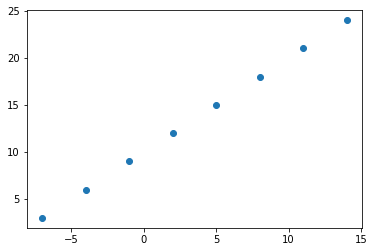

In [ ]:
## Creating data to view to fit
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
# Turn out numpy arrays into tensor
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

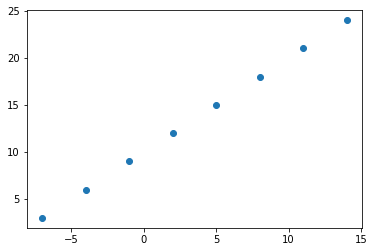

In [ ]:
plt.scatter(X, y)

## Steps in modelling with tensorflow

1. Creating a model - define the input and Output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the losee function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & y (features and labels).

In [ ]:
# Set random seed
tf.random.set_global_generator(42)

# 1. Create a modle using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss =tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 492ms/step - loss: 14.7799 - mae: 14.7799
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 14.6474 - mae: 14.6474
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 14.5149 - mae: 14.5149
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 14.3824 - mae: 14.3824
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 14.2499 - mae: 14.2499


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make aprediction using a model
y_pred = model.predict([17.0])
y_pred

array([[-3.1914952]], dtype=float32)

In [ ]:
y_pred + 20

array([[16.808504]], dtype=float32)

### Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of thee optimization function.
3. **Fitting a model** - here wemmight fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# Let's rebuild our model

# 1. Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 280ms/step - loss: 9.3205 - mae: 9.3205
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 9.1880 - mae: 9.1880
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 9.0555 - mae: 9.0555
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 8.9230 - mae: 8.9230
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 8.7905 - mae: 8.7905
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 8.6580 - mae: 8.6580
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 8.5255 - mae: 8.5255
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 8.3930 - mae: 8.3930
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 8.2605 - mae: 8.2605
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 8.1280 - mae: 8.1280
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 7.99

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's see if our model's prediction has improved..
model.predict([17.0])

array([[30.01308]], dtype=float32)

In [ ]:
# Let's rebuild again to improve our model

# 1. Create a model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
   tf.keras.layers.Dense(50, activation=None),
   tf.keras.layers.Dense(1)                         
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              # optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 0s 398ms/step - loss: 12.6347 - mae: 12.6347
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 11.9464 - mae: 11.9464
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.2513 - mae: 11.2513
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5479 - mae: 10.5479
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 9.8341 - mae: 9.8341
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 9.1086 - mae: 9.1086
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 8.3695 - mae: 8.3695
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 7.6144 - mae: 7.6144
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 6.8401 - mae: 6.8401
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 6.8106 - mae: 6.8106
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - lo

In [ ]:
model.predict([17.0])

array([[28.724184]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through wven building a neural networks is:

'''
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> tweak a model -> fit it -> evaluate it ....
'''

When it comes to evaluation... there ae 3 workd you should memorize:

> "Visualize, visualzie, visualzie"
It's a good idea to visualize:
* The data - what data ae we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The prediction of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

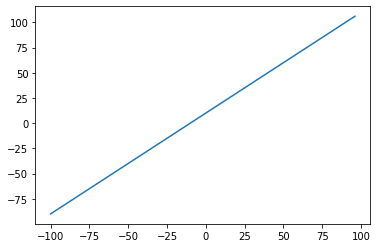

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.plot(X, y)

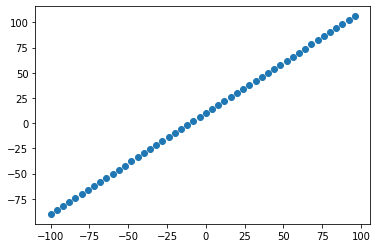

In [ ]:
plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluates on this data to test what it has learned, this set is typically 10-15% of the total data availabel.

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into tain and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 ae testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets...lets' visualize it again!

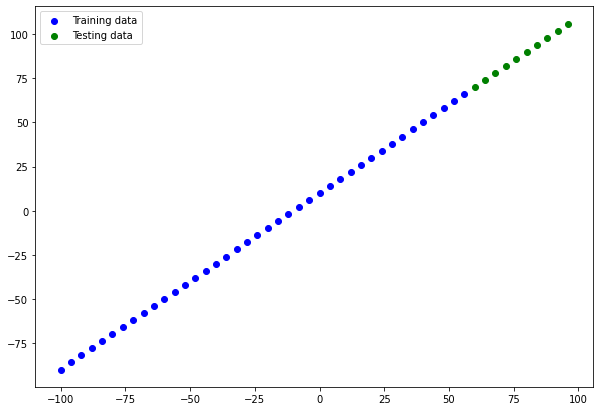

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data") # our model will learn on this
# Plt test data in gree
plt.scatter(X_test, y_test, c="g", label="Testing data") # want our model to be to predict this (given X, what's y?)
# Show a legend
plt.legend()

In [ ]:
# Let's have a look at have to build a neural network for our data

# 1. create a model
model = tf.keras.Sequential([
   tf.keras.layers.Dense(1)                          
])

# 2. Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# # 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [ ]:
# Let's create a model which build automatically by defining the input_shape arguments
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer1"),
  tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer1 (Dense)        (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parametes aren't upated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

In [ ]:
# Let's fit our model to the taining data
model.fit(X_train, y_train, epochs = 100, verbose = 0)

In [ ]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer1 (Dense)        (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


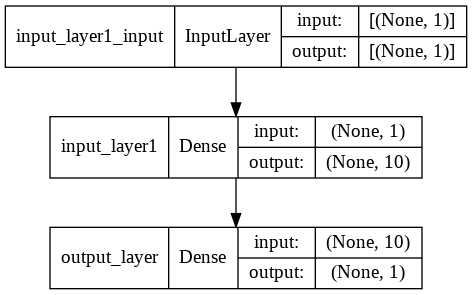

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualzieing our models predictions

To visualize prediction, it;s a good idea to plot them agaisnt the ground truth labels.

Often you'll see this in tve form of 'y_test' or 'y_true versus 'y+pred' (ground truth versus your model's prediction)

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** If you feel like you're going to resue some kind of functionality in the future, it's a good idea to turn into a fucntion.

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  """
  Plots training data, test data and compares perdictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot's model's prediction in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

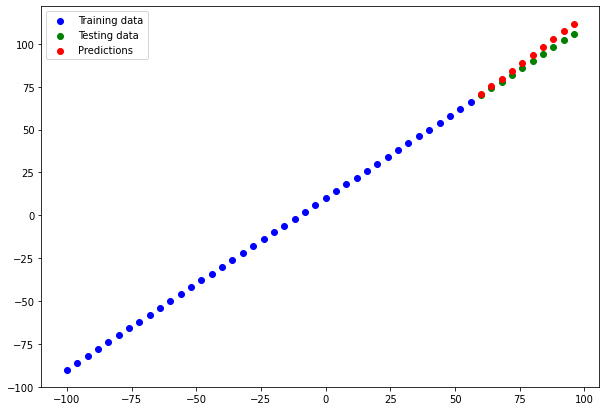

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we;re working on a regression, two of the main metrics:
* MAE - mean absoulte error, "on average, how wrong is each of my model's predictions."
* MSE - mean square error, "square the average errors."

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 140ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [ ]:
# Calculate the mean absolute error
loss = tf.metrics.mean_absolute_error(y_true=y_test,
                                      y_pred=tf.constant(y_pred))
loss

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [ ]:
# Calculate mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [ ]:
# Calculate mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [ ]:
# Caculate huber
hb = tf.keras.losses.huber(y_true=y_test,
                           y_pred=tf.squeeze(y_pred),
                           delta=1.0)
hb

<tf.Tensor: shape=(), dtype=float32, numpy=2.7069678>

In [ ]:
# Make somme functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it.... 
```

1. Get more data - get more examples for our model to train on (more opportunities to learn patterns or relationships between featuers and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for loner - give your model mor of a chance to find patterns in a data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model. 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs

**Build model_1**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
   tf.keras.layers.Dense(1)                            
])

# 2. Compile model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 19.0311 - mae: 19.0311
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 10.8111 - mae: 10.8111
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 14.5005 - mae: 14.5005
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 10.0958 - mae: 10.0958
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 15.5388 - mae: 15.5388
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 11.8626 - mae: 11.8626
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 9.1727 - mae: 9.1727
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 13.6143 - mae: 13.6143
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 13.8577 - mae: 13.8577
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 9.9966 - mae: 9.9966
Epoch 11/100
2/2 [==============================] - 0s 7ms/step

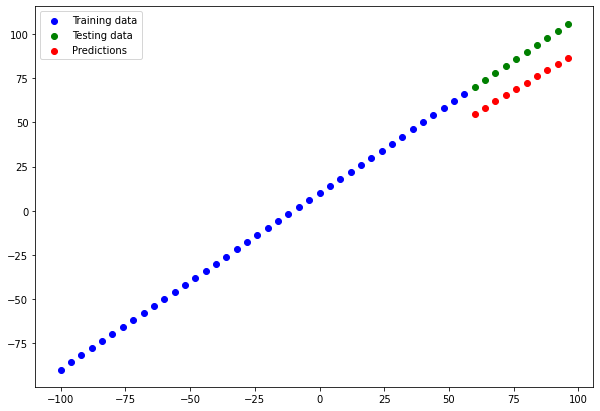

In [ ]:
# Make and plot predictions for model_1
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=17.272385>,
 <tf.Tensor: shape=(), dtype=float32, numpy=300.0373>)

**Build model_2**

* 2 dense layers, trained for 100 epochs

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 40.2867 - mae: 40.2867
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 25.9297 - mae: 25.9297
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 44.1696 - mae: 44.1696
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2212 - mae: 11.2212
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 23.0317 - mae: 23.0317
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 24.2563 - mae: 24.2563
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 11.2416 - mae: 11.2416
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 34.1576 - mae: 34.1576
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 12.5246 - mae: 12.5246
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1823 - mae: 10.1823
Epoch 11/100
2/2 [==============================] - 0s 8ms/

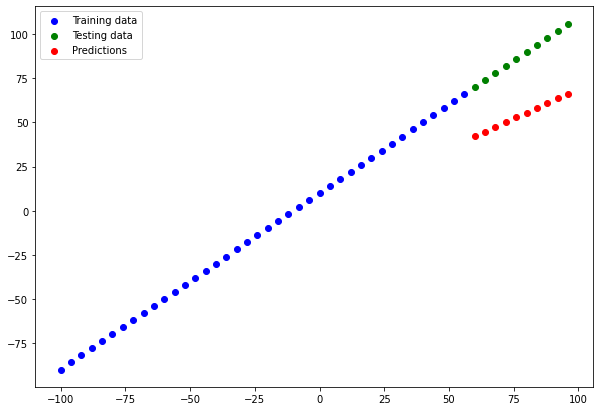

In [ ]:
# Make and plot predictions of model_2
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [ ]:
# Calculate model_2 evaluation metric
# mae_2 = mae(y_test, y_pred_2)
# mse_2 = mse(y_test, y_pred_2)
# mae_2, mse_2
mae_2 = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred_2))
mse_2 = tf.metrics.mean_squared_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred_2))
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=33.827583>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1158.2341>)

**Build model_3**

* 2 layers, trained for 500 epocs

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X, axis=-1), y, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 6ms/step - loss: 40.2867 - mae: 40.2867
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 25.9297 - mae: 25.9297
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 44.1696 - mae: 44.1696
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 11.2212 - mae: 11.2212
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 23.0317 - mae: 23.0317
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 24.2563 - mae: 24.2563
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 11.2416 - mae: 11.2416
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 34.1576 - mae: 34.1576
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 12.5246 - mae: 12.5246
Epoch 10/500
2/2 [==============================] - 0s 12ms/step - loss: 10.1823 - mae: 10.1823
Epoch 11/500
2/2 [==============================] - 0s 5ms

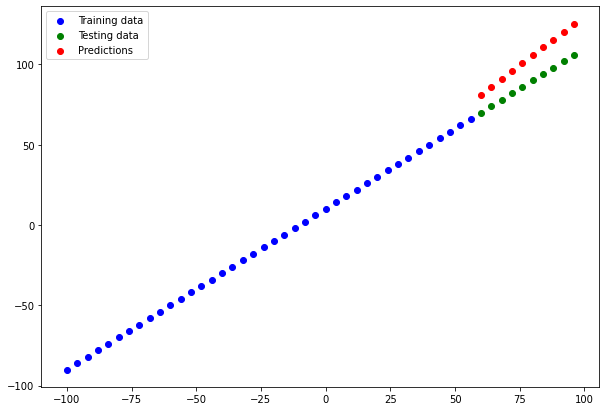

In [ ]:
# Make and plot predictions of model_2
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [ ]:
# Calculate model_3 evaluation metrics
# mae_3 = mae(y_test, y_pred_3)
# mse_3 = mse(y_test, y_pred_3)
# loss_object = tf.keras.losses.binary_crossentropy(y_true=y_test, y_pred=tf.squeeze(y_pred_3))
# mae_3, mse_3
# loss_object
mae_3 = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred_3))
mse_3 = mae = tf.metrics.mean_squared_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred_3))
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=15.080874>,
 <tf.Tensor: shape=(), dtype=float32, numpy=235.06535>)

**Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

### Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [ ]:
# Let's compare our model's resutls using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["models", "mae", "mse"])
all_results

,models,mae,mse
0,model_1,17.272385,300.037292
1,model_2,33.827583,1158.234131
2,model_3,15.080874,235.065353


In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out' which don't work and in turn, get close to figuring out what does work. Remember the machine learning practioner's motto: "experiment, experiment, experiment"

## Tracking your experiments

One really good habit in machine learning modelling is to track the reuslts of your experiments.

And when doing so, it can be tedious if you're running losts of experiments.

Luckily, there are tools to help us!

**Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensroBoard).

### Saving our models

Saving our models allows us to use them outside of Google colab (or wherever they were trained) such as in a web application or a mobile app.

There ae two main formats we can save ur model's too:

1. SaveModel format
2. HDF5 format

In [ ]:
# Save model
model_3.save("best_model_savemodel_format")

INFO:tensorflow:Assets written to: best_model_savemodel_format/assets


In [ ]:
# save model using hdf5 format
model_3.save("best_model_HDF5_format.h5")

### Loading in a saved model

In [ ]:
# Load in the savedmodel format model
loaded_savedmodel_format = tf.keras.models.load_model("best_model_savemodel_format")
loaded_savedmodel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_3 prediction with savedmodel format model predictions
model_3_pred = model_3.predict(X_test)
loaded_savedmodel_format_pred = loaded_savedmodel_format.predict(X_test)
model_3_pred == loaded_savedmodel_format_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
mae_model_3 = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(model_3_pred))
mae_loaded = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(loaded_savedmodel_format_pred))
mae_model_3 == mae_loaded

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
# Load in model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3_pred = model_3.predict(X_test)
loaded_h5_model_pred = loaded_h5_model.predict(X_test)
model_3_pred == loaded_h5_model_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### A larger example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in insurance dataet
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
# Create X & y values (featues and labels)
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]

In [ ]:
# view X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# view y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
# Build a neurl network (sort of like model 2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
# 3. Fit model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7493.1743 - mae: 7493.1743

In [ ]:
# Check results of the insurance model on test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

Improve our model

to try improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use Adam optimizer
2. Train for longer

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7409.0811 - mae:

In [ ]:
# Evaluate larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7409.0811 - mae:

In [ ]:
# Evaluate model 3
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

Text(0.5, 0, 'epochs')

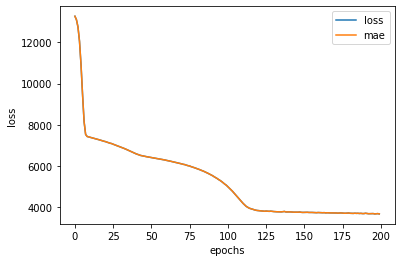

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

>**Question:** how long should you tain for?

It depends. Really.. it depends on the problm you're working on. however, many people have aksed this question before... so TensorFlow has a solution! It's called the [EarlyStopping Callback], which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric

### Preprocessing Data (normalization and standardtization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [ ]:
import pandas as pf
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit column transformer on our training data
ct.fit(X_train)

# Transform taining and test data  with normzalization (MinMaxScaler) and onhotencoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# What does data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Our data has been normalized and one hot encoded. Now let's build a neural network model on it and how it goes.

In [ ]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create a model
insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 8s 2ms/step - loss: 13342.6475 - mae: 13342.6475
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11925.96

In [ ]:
# Evalaute our insurance model trained on normalized daata
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

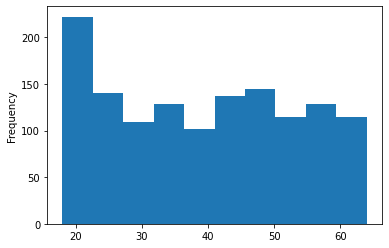

In [ ]:
X["age"].plot(kind="hist")

In [ ]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64